In [27]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
!pip install matplotlib



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("StreamingHistory_Extended.csv")

print(df.head())
print(df.dtypes)


                     ts     username               platform  ms_played  \
0  2020-12-06T02:51:11Z  11145402699  iOS 14.2 (iPhone12,3)     145610   
1  2020-12-06T02:53:31Z  11145402699  iOS 14.2 (iPhone12,3)     138692   
2  2020-12-06T02:53:53Z  11145402699  iOS 14.2 (iPhone12,3)      22662   
3  2020-12-06T02:53:56Z  11145402699  iOS 14.2 (iPhone12,3)       2716   
4  2020-12-06T02:53:57Z  11145402699  iOS 14.2 (iPhone12,3)        116   

  conn_country user_agent_decrypted   master_metadata_track_name  \
0           AR              unknown   Hey Jude - Remastered 2015   
1           AR              unknown              Hacer un puente   
2           AR              unknown  Happy Together - Remastered   
3           AR              unknown                       Demons   
4           AR              unknown              Paint It, Black   

  master_metadata_album_artist_name master_metadata_album_album_name  \
0                       The Beatles                                1   
1 

C:\Users\user\AppData\Local\Temp\ipykernel_21260\1737300765.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


In [ ]:
#¿Que información contiene el dataset? Describir las columnas y los tipos de datos. Pista: ¿Son todas las columnas necesarias para el análisis? ¿Son todos los registros del mismo tipo?
# El dataset contiene información sobre el historial de streaming de música y podcasts. Las columnas por ejemplo incluyen:
# - `endTime`: Fecha y hora en que se terminó de reproducir la canción o podcast (tipo datetime).
# - `artistName`: Nombre del artista (tipo string).
# - `trackName`: Nombre de la canción o podcast (tipo string).
# - `msPlayed`: Tiempo en milisegundos que se reprodujo la canción o podcast (tipo int).
# Hay algunas columnas que los ejercicios no piden que utilicemos pero nos ayudan con algunso datos, ademas algunas las utilizamos para el analisis de los graficos.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125349 entries, 0 to 125348
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 125349 non-null  object
 1   username                           125349 non-null  int64 
 2   platform                           125349 non-null  object
 3   ms_played                          125349 non-null  int64 
 4   conn_country                       125349 non-null  object
 5   user_agent_decrypted               104897 non-null  object
 6   master_metadata_track_name         123953 non-null  object
 7   master_metadata_album_artist_name  123953 non-null  object
 8   master_metadata_album_album_name   123953 non-null  object
 9   spotify_track_uri                  123953 non-null  object
 10  episode_name                       168 non-null     object
 11  episode_show_name                  168 non-null     

C:\Users\user\AppData\Local\Temp\ipykernel_21260\731907568.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


In [31]:
#¿A partir de que fecha se registraron las reproducciones? ¿Hasta que fecha?
#to_datetime es una funcion de pandas que la usamos para pasar los milisegundos de la columna ts a datetime, fecha y hora
df["ts"] = pd.to_datetime(df["ts"])
print("Desde:", df["ts"].min())
print(" Hasta:", df["ts"].max())

Desde: 2014-06-27 18:01:15+00:00
 Hasta: 2024-05-23 23:56:20+00:00


In [32]:
#¿Cuántas canciones diferentes se escucharon en total?
# Filtrar solo canciones (descartar podcasts)
df_canciones = df[df["is_podcast"] != True]

# Contar las canciones diferentes
canciones_unicas = df_canciones["master_metadata_track_name"].nunique()

#nunique evita canciones repetidas (valores unicos)
print("Canciones diferentes escuchadas:", canciones_unicas)


Canciones diferentes escuchadas: 9708


In [33]:
#¿Cuánto es la duración total de las reproducciones de canciones registradas? Pista: ¿Alguna columna del dataset indica la duración de la reproducción?
#la columna ms_played indica la duración de la reproducción en milisegundos
ms_totales = df_canciones["ms_played"].sum()
#sum es una funcion de pandas que suma todos los valores de la columna ms_played
#en minutos< 
ms_totales_minutos = ms_totales / (1000 * 60)
#print("Duración total de reproducciones de canciones (en minutos):", ms_totales_minutos)
#round es una funcion de python que redondea el numero a 2 decimales
redondeado = round(ms_totales_minutos, 2)
print ("Duración total de reproducciones de canciones (en minutos):", redondeado)




Duración total de reproducciones de canciones (en minutos): 207998.66


In [34]:
#¿Cuál es el artista más escuchado por tiempo total de reproducción?
df_artistas = df_canciones.groupby("master_metadata_album_artist_name")["ms_played"].sum().reset_index()
#reset_index() es una funcion de pandas que convierte el índice en una columna normal
df_artistas = df_artistas.sort_values(by="ms_played", ascending=False)
#sort_values es una funcion de pandas que ordena los valores de la columna ms_played de mayor a menor
artista_mas_escuchado = df_artistas.iloc[0]
#df_artistas.iloc[0] es una funcion de pandas que devuelve la primera fila del dataframe df_artistas
print("Artista:", artista_mas_escuchado["master_metadata_album_artist_name"])
#Ejercicio 7 El artista más escuchado (por tiempo reproducido), ¿cuál es la canción más escuchada?
cancion_mas_escuchada = df_canciones[df_canciones["master_metadata_album_artist_name"] == artista_mas_escuchado["master_metadata_album_artist_name"]]
cancion_mas_escuchada = cancion_mas_escuchada.groupby("master_metadata_track_name")["ms_played"].sum().reset_index()
cancion_mas_escuchada = cancion_mas_escuchada.sort_values(by="ms_played", ascending=False)
cancion_mas_escuchada = cancion_mas_escuchada.iloc[0]
print("Canción más escuchada:", cancion_mas_escuchada["master_metadata_track_name"])



Artista: Charly García
Canción más escuchada: Hablando a Tu Corazón


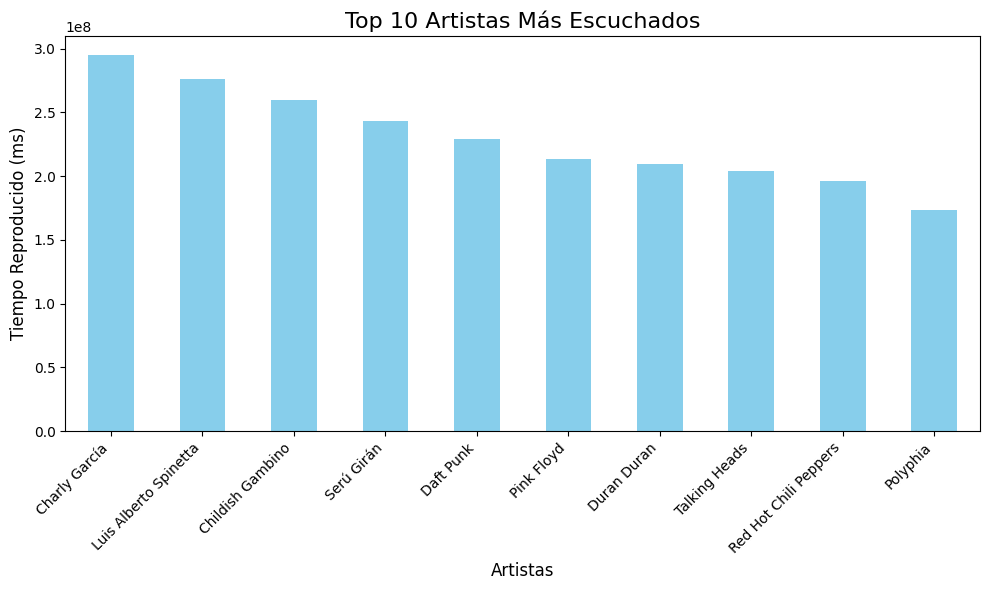

In [35]:
#Determinar el top 10 de artistas más escuchados . Elegir un tipo de gráfico adecuado para visualizar los resualtados.
# Filtrar las filas donde el artista no sea nulo
df = df[df['master_metadata_album_artist_name'].notnull()]
#notnull 

# Agrupar por artista y sumar el tiempo de reproducción (ms_played)
artist_playtime = df.groupby('master_metadata_album_artist_name')['ms_played'].sum()
# Ordenar por tiempo de reproducción y seleccionar el Top 10
top_10_artists = artist_playtime.sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Top 10 Artistas Más Escuchados', fontsize=16)
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Tiempo Reproducido (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()




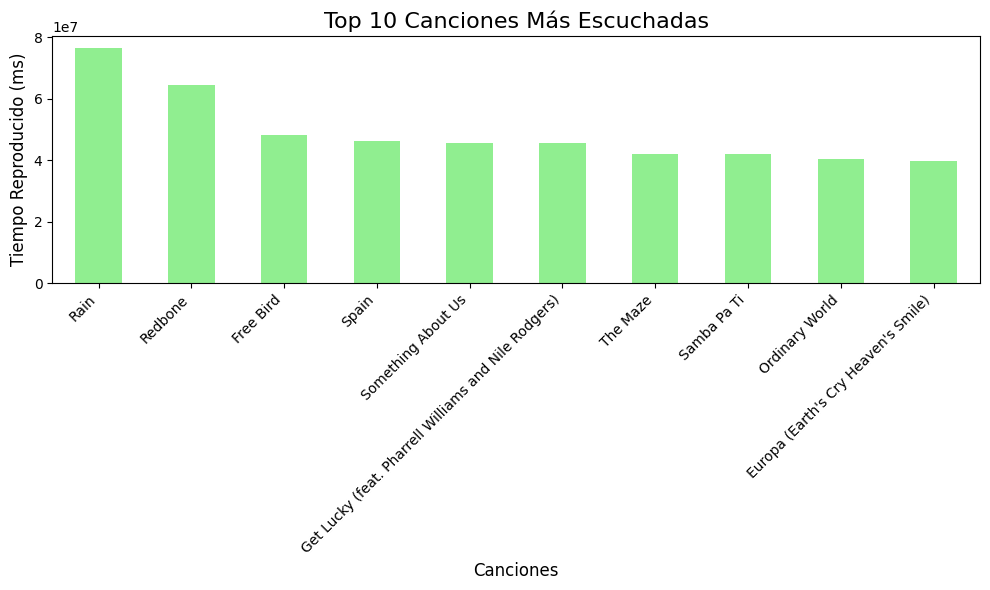

In [36]:
#Determinar el top 10 de canciones más escuchadas. Elegir un tipo de gráfico adecuado para visualizar los resultados.
# Agrupar por canción y sumar el tiempo de reproducción (ms_played)
top_10_canciones = df.groupby('master_metadata_track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_canciones.plot(kind='bar', color='lightgreen')
# Añadir títulos y etiquetas
plt.title('Top 10 Canciones Más Escuchadas', fontsize=16)
plt.xlabel('Canciones', fontsize=12)
plt.ylabel('Tiempo Reproducido (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21260\483952413.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_canciones['month_year'] = df_canciones['ts'].dt.to_period('M')


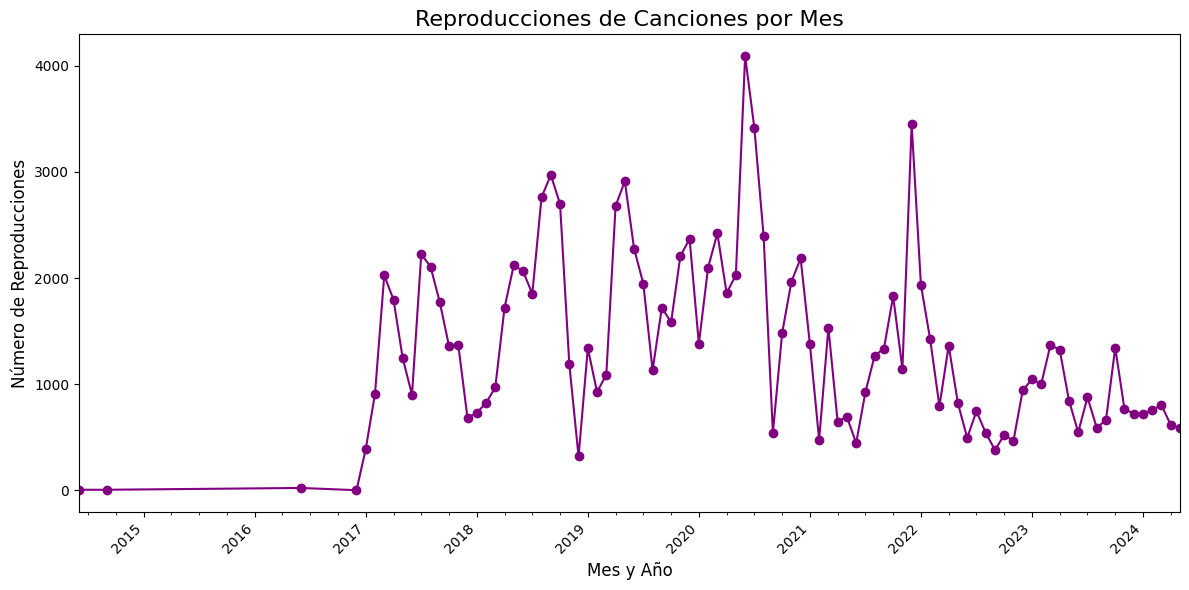

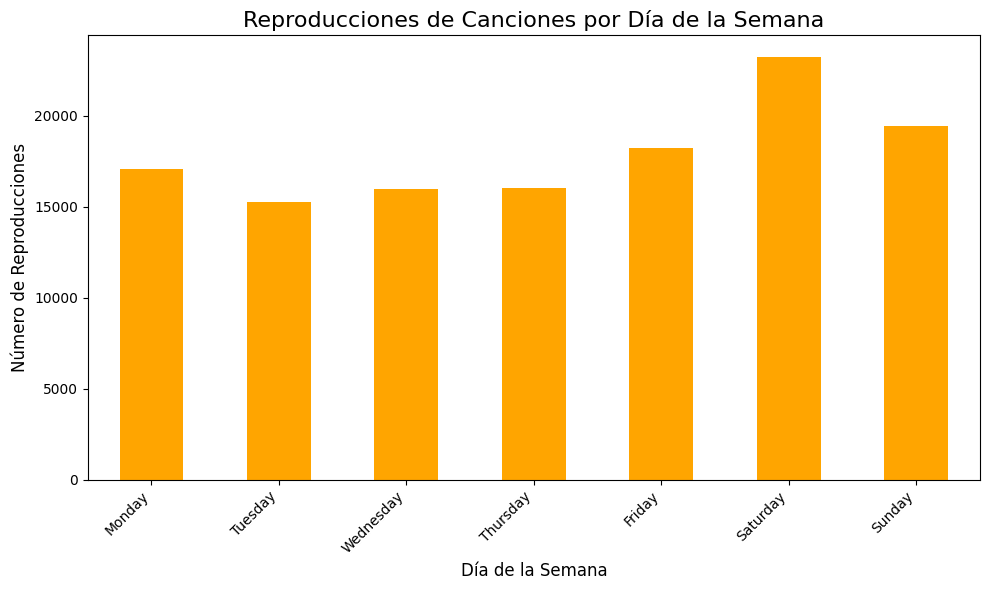

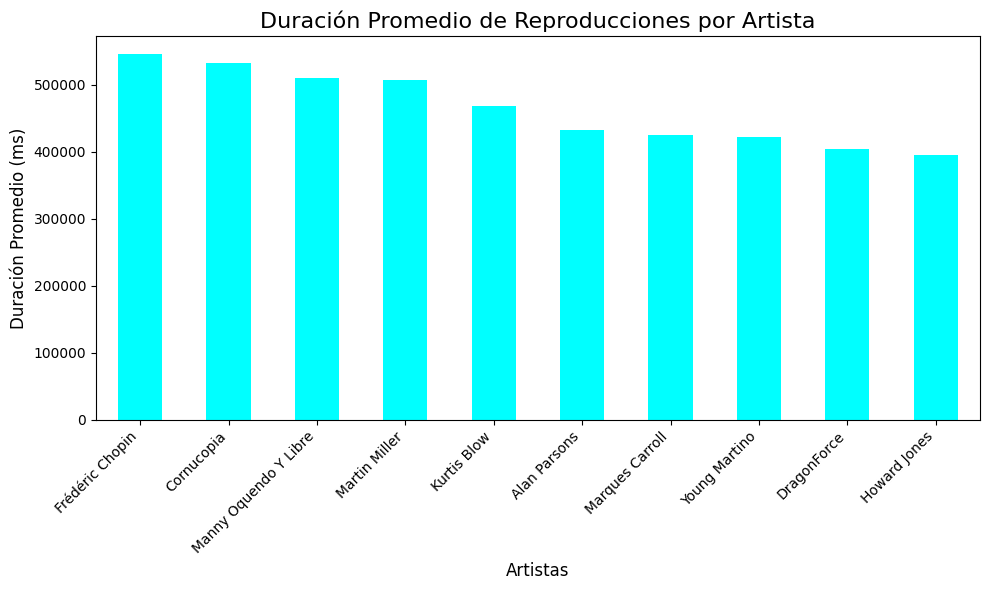

In [37]:
#Además se deben plantear al menos 3 análisis adicionales. Responderlas utilizando el dataset y acompañarlas con gráficos adecuados.
# Análisis adicional 1: ¿Cuál es el mes con más reproducciones de canciones?
# Convertir la columna 'ts' a datetime
df_canciones['ts'] = pd.to_datetime(df_canciones['ts'])
# Extraer el mes y el año de la fecha
df_canciones['month_year'] = df_canciones['ts'].dt.to_period('M')
# Agrupar por mes y año, y contar las reproducciones
reproducciones_por_mes = df_canciones.groupby('month_year').size()
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
reproducciones_por_mes.plot(kind='line', marker='o', color='purple')
# Añadir títulos y etiquetas
plt.title('Reproducciones de Canciones por Mes', fontsize=16)
plt.xlabel('Mes y Año', fontsize=12)
plt.ylabel('Número de Reproducciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Análisis adicional 2: ¿Cuál es el día de la semana con más reproducciones de canciones?
# Extraer el día de la semana de la fecha
df_canciones['day_of_week'] = df_canciones['ts'].dt.day_name()
# Agrupar por día de la semana y contar las reproducciones
reproducciones_por_dia = df_canciones.groupby('day_of_week').size()
# Reordenar los días de la semana
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
reproducciones_por_dia = reproducciones_por_dia.reindex(dias_semana)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
reproducciones_por_dia.plot(kind='bar', color='orange')
# Añadir títulos y etiquetas
plt.title('Reproducciones de Canciones por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Reproducciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()
# Análisis adicional 3: ¿Cuál es la duración promedio de las reproducciones de canciones por artista?
# Agrupar por artista y calcular la duración promedio de las reproducciones
duracion_promedio_artista = df_canciones.groupby('master_metadata_album_artist_name')['ms_played'].mean().sort_values(ascending=False).head(10)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
duracion_promedio_artista.plot(kind='bar', color='cyan')
# Añadir títulos y etiquetas
plt.title('Duración Promedio de Reproducciones por Artista', fontsize=16)
plt.xlabel('Artistas', fontsize=12)
plt.ylabel('Duración Promedio (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Mostrar el gráfico
plt.tight_layout()
plt.show()

